In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv("heart.csv")

#step2: to check for mising values
print(df.isnull().sum())#there is no missing value in dataset

#step3: to select feature or target
X = df.drop('HeartDisease', axis= 1)
Y = df['HeartDisease']
X.dtypes
X = pd.get_dummies(X, drop_first=True) #text ko num ma convert krny ka tarika


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


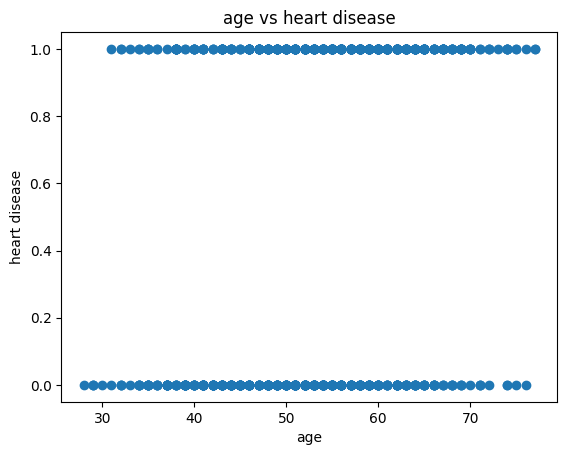

In [13]:
#step4: perform EDA

df.info() # basic info(data type,non -null values ,memory use by data frame)
df.describe()# avg values,min,max

plt.scatter(df["Age"], df["HeartDisease"])#scater plot is used to find the co-relation btw two variables
plt.title("age vs heart disease")
plt.xlabel("age")
plt.ylabel("heart disease")
plt.show()


In [14]:
#step5: model train
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

#Accuracy:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

#confusion Matrics:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

#[[64(TN) 17(FP)] #accuracy:(TP+TN)/TOTAL =84%
#[12(FN)  91(TP)]] #PRECISION:(TP)/(TP+FP) = 84%
                    #RECALL: (TP)/(TP+FN)  = 88%

#Roc curve()
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)


0.875
[[62 14]
 [ 9 99]]
0.9339668615984406


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#step 9:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_[0]
}).sort_values(by="Importance", ascending=False)
print(feature_importance)

              Feature  Importance
6               Sex_M    1.414571
3           FastingBS    1.167159
13      ST_Slope_Flat    1.094126
12   ExerciseAngina_Y    0.742996
5             Oldpeak    0.367835
0                 Age    0.019994
1           RestingBP    0.003731
2         Cholesterol   -0.003181
4               MaxHR   -0.004010
10  RestingECG_Normal   -0.111397
11      RestingECG_ST   -0.284496
9    ChestPainType_TA   -0.961522
14        ST_Slope_Up   -1.271811
7   ChestPainType_ATA   -1.463698
8   ChestPainType_NAP   -1.566305
